In [1]:
!pip install yfinance

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
sns.set_style('darkgrid')

In [3]:
#haetaan Amazonin ja Applen osakkeiden historiatiedot vuodesta 2018. Tarkastetaan Amazonin datan alku- ja loppuosa.

amazon = yf.download('AMZN', start='2018-1-1')
apple = yf.download('AAPL', start='2018-1-1')
amazon

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,58.599998,59.500000,58.525501,59.450500,59.450500,53890000
2018-01-03,59.415001,60.274502,59.415001,60.209999,60.209999,62176000
2018-01-04,60.250000,60.793499,60.233002,60.479500,60.479500,60442000
2018-01-05,60.875500,61.457001,60.500000,61.457001,61.457001,70894000
2018-01-08,61.799999,62.653999,61.601501,62.343498,62.343498,85590000
...,...,...,...,...,...,...
2024-02-15,170.580002,171.169998,167.589996,169.800003,169.800003,49855200
2024-02-16,168.740005,170.419998,167.169998,169.509995,169.509995,48074600
2024-02-20,167.830002,168.710007,165.740005,167.080002,167.080002,41980300


<Axes: xlabel='Date'>

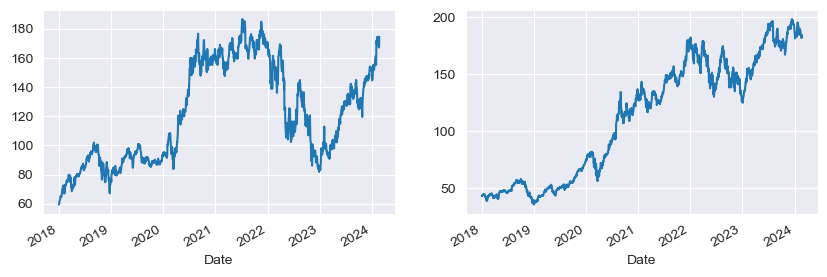

In [4]:
#Kehitys koko aikavälillä

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
amazon['Close'].plot(ax=axs[0])
apple['Close'].plot(ax=axs[1])

<Axes: xlabel='Date'>

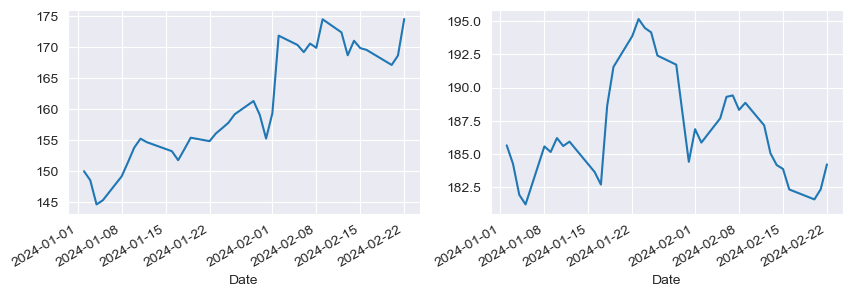

In [5]:
#Kehitys vuonna 2024

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
amazon['Close']['2024':].plot(ax=axs[0])
apple['Close']['2024':].plot(ax=axs[1])

<Axes: xlabel='Date'>

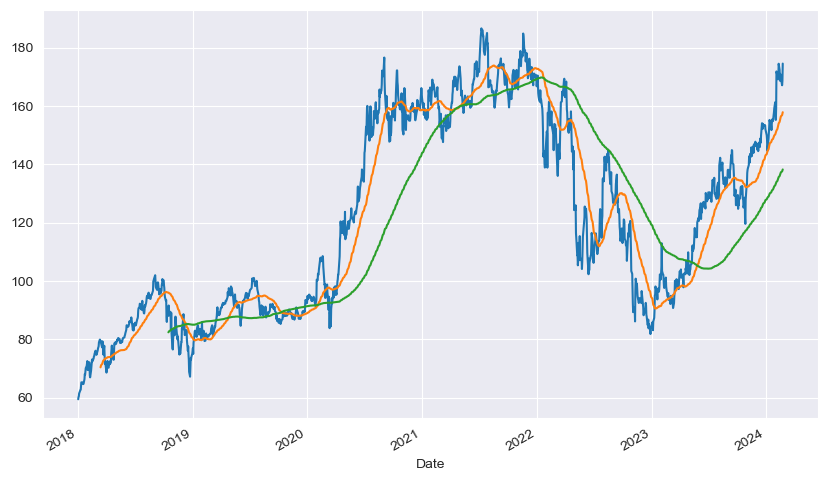

In [6]:
#50:n ja 200:n päivän liukuvat keskiarvot asetettu Amazonin päätöshintojen päälle

amazon['Close'].plot(figsize=(10, 6))

#50 päivän liukuvat keskiarvot
amazon['Close'].rolling(50).mean().plot()

#200 päivän liukuvat keskiarvot
amazon['Close'].rolling(200).mean().plot()

<Axes: xlabel='Date'>

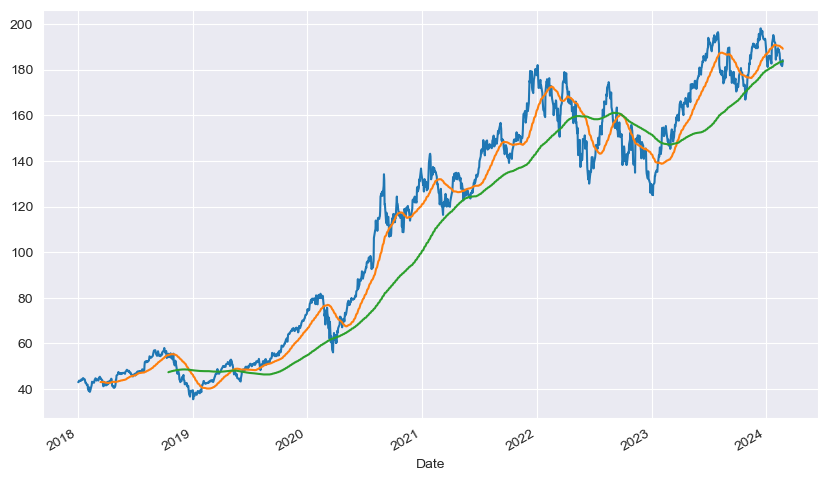

In [7]:
#Sama Applelle

apple['Close'].plot(figsize=(10, 6))

#50 päivän liukuvat keskiarvot
apple['Close'].rolling(50).mean().plot()

#200 päivän liukuvat keskiarvot
apple['Close'].rolling(200).mean().plot()

<Axes: xlabel='Date'>

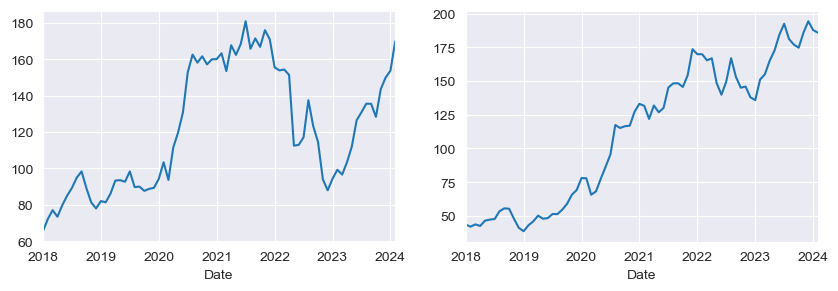

In [8]:
#Päivän päätöshintojen aggregointi kuukausitasolle 

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
amazon['Close'].resample('M').mean().plot(ax=axs[0])
apple['Close'].resample('M').mean().plot(ax=axs[1])

<Axes: xlabel='Date'>

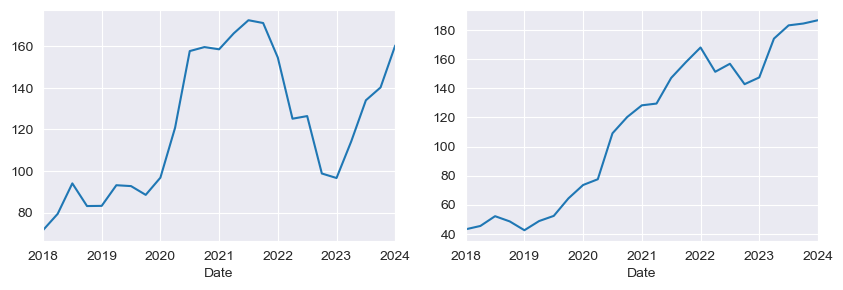

In [9]:
#Sama vuosineljännestasolle

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
amazon['Close'].resample('Q').mean().plot(ax=axs[0])
apple['Close'].resample('Q').mean().plot(ax=axs[1])

Text(0, 0.5, 'Miljoonaa kpl')

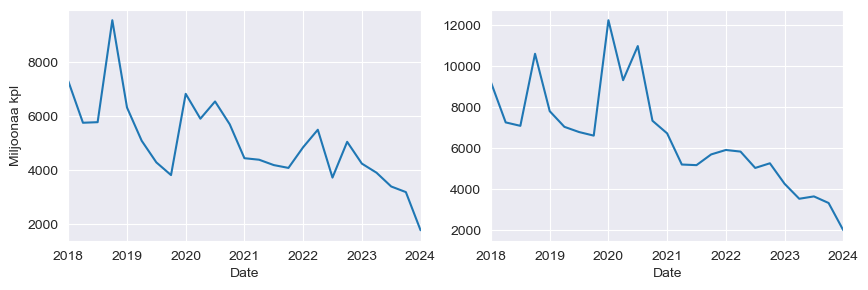

In [10]:
#Osakkeiden vaihdon määrät (kpl) vuosineljänneksittäin

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
(amazon['Volume']/1000000).resample('Q').sum().plot(ax=axs[0])
(apple['Volume']/1000000).resample('Q').sum().plot(ax=axs[1])
axs[0].set_ylabel('Miljoonaa kpl')

In [11]:
#Prosenttimuutokset edellisestä päivästä

amazon['Amazon%'] = amazon['Close'].pct_change()
apple['Apple%'] = apple['Close'].pct_change()

#Tsekkaukset
amazon

,Open,High,Low,Close,Adj Close,Volume,Amazon%
Date,,,,,,,
2018-01-02,58.599998,59.500000,58.525501,59.450500,59.450500,53890000,NaN
2018-01-03,59.415001,60.274502,59.415001,60.209999,60.209999,62176000,0.012775
2018-01-04,60.250000,60.793499,60.233002,60.479500,60.479500,60442000,0.004476
2018-01-05,60.875500,61.457001,60.500000,61.457001,61.457001,70894000,0.016163
2018-01-08,61.799999,62.653999,61.601501,62.343498,62.343498,85590000,0.014425
...,...,...,...,...,...,...,...
2024-02-15,170.580002,171.169998,167.589996,169.800003,169.800003,49855200,-0.006901
2024-02-16,168.740005,170.419998,167.169998,169.509995,169.509995,48074600,-0.001708
2024-02-20,167.830002,168.710007,165.740005,167.080002,167.080002,41980300,-0.014335


In [12]:
apple

,Open,High,Low,Close,Adj Close,Volume,Apple%
Date,,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.670975,102223600,NaN
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.663891,118071600,-0.000174
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.852779,89738400,0.004645
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.317894,94640000,0.011385
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.164436,82271200,-0.003714
...,...,...,...,...,...,...,...
2024-02-15,183.550003,184.490005,181.350006,183.860001,183.860001,65434500,-0.001575
2024-02-16,183.419998,184.850006,181.669998,182.309998,182.309998,49701400,-0.008430
2024-02-20,181.789993,182.429993,180.000000,181.559998,181.559998,53665600,-0.004114


Molemmissa osakkeissa merkittävää kasvua viime vuosina

In [13]:
#Yhdistetään Amazonin ja Applen muutosprosentit omaksi dataframeksi
muutokset = pd.concat([amazon['Amazon%'], apple['Apple%']], axis=1)


#NaN-arvot 0-arvoiksi
muutokset = muutokset.fillna(0)

muutokset

,Amazon%,Apple%
Date,,
2018-01-02,0.000000,0.000000
2018-01-03,0.012775,-0.000174
2018-01-04,0.004476,0.004645
2018-01-05,0.016163,0.011385
2018-01-08,0.014425,-0.003714
...,...,...
2024-02-15,-0.006901,-0.001575
2024-02-16,-0.001708,-0.008430
2024-02-20,-0.014335,-0.004114


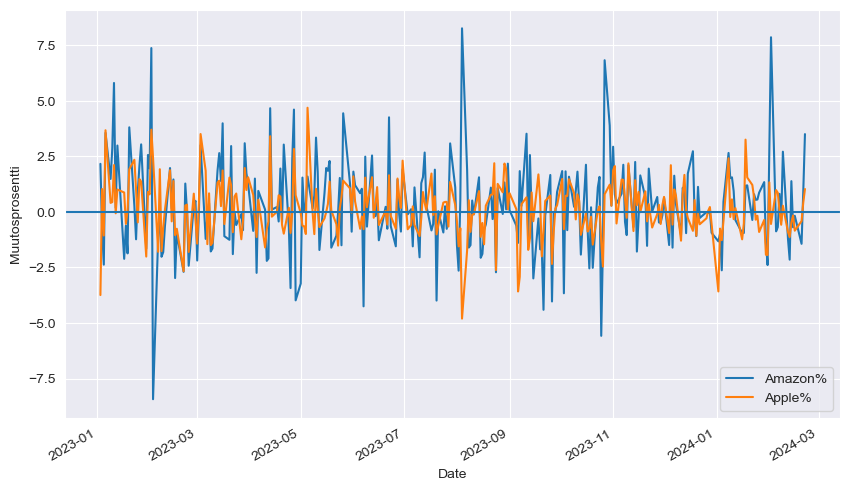

In [14]:
#Amazonin ja Applen päivittäiset muutosprosentit vuonna 2023, vaakaviiva nollan kohdalle
(muutokset['2023':]*100).plot(figsize=(10, 6))

plt.ylabel('Muutosprosentti')
plt.axhline()

In [15]:
#Tilastolliset tunnusluvut muutoksille (%)

(muutokset*100).describe().round(2)

,Amazon%,Apple%
count,1545.00,1545.00
mean,0.09,0.11
std,2.22,1.98
min,-14.05,-12.86
25%,-1.04,-0.83
50%,0.12,0.10
75%,1.22,1.17
max,13.54,11.98


<Axes: >

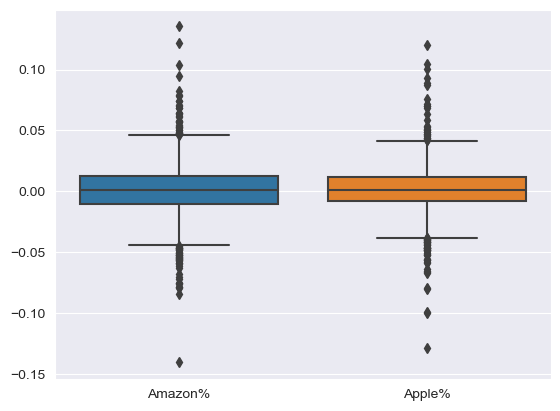

In [16]:
sns.boxplot(data=muutokset)

Amazonin osakekurssissa muutokset ovat olleet hieman voimakkaampia.

In [17]:
#Päivät, jolloin arvonmuutos ollut yli 6%
muutokset[(abs(muutokset['Amazon%'])>0.06) | (abs(muutokset['Apple%'])>0.06)]

,Amazon%,Apple%
Date,,
2018-10-10,-0.061524,-0.046326
2018-10-25,0.070887,0.021898
2018-10-26,-0.078197,-0.015924
2018-10-29,-0.063264,-0.018770
2018-11-02,0.000000,-0.066331
2018-11-07,0.068590,0.030328
2018-11-28,0.060914,0.038453
2018-12-26,0.094452,0.070422
2019-01-03,-0.025241,-0.099607


Huomaa että keväällä 2020 tapahtui "jotain", sillä voimakkaiden vaihteluiden päiviä oli huomattavasti enemmän kuin aiempina vuosina. Korona ravisutti osakemarkkinoitakin.

In [18]:
#Korrelaatio Amazonin ja Applen muutosprosenttien välillä

muutokset.corr()

,Amazon%,Apple%
Amazon%,1.000000,0.620374
Apple%,0.620374,1.000000


Suhteellisen vahva positiivinen korrelaatio

<Axes: xlabel='Amazon%', ylabel='Apple%'>

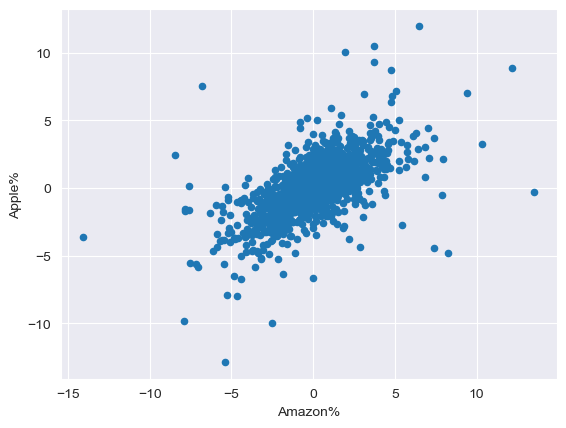

In [19]:
#Hajontakaavio

(muutokset*100).plot(kind='scatter', x='Amazon%', y='Apple%')

<Axes: xlabel='Date'>

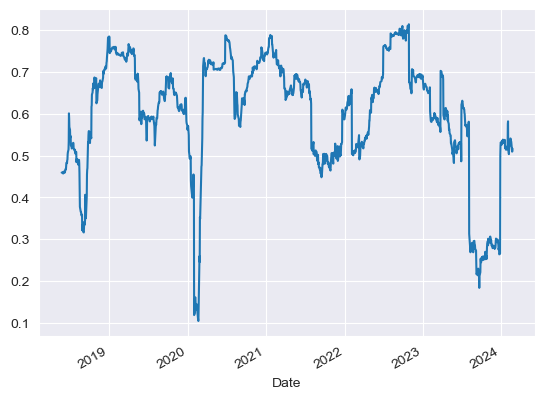

In [20]:
#Liukuva korrelaatio

muutokset['Amazon%'].rolling(100).corr(muutokset['Apple%']).plot()

<Axes: xlabel='Date'>

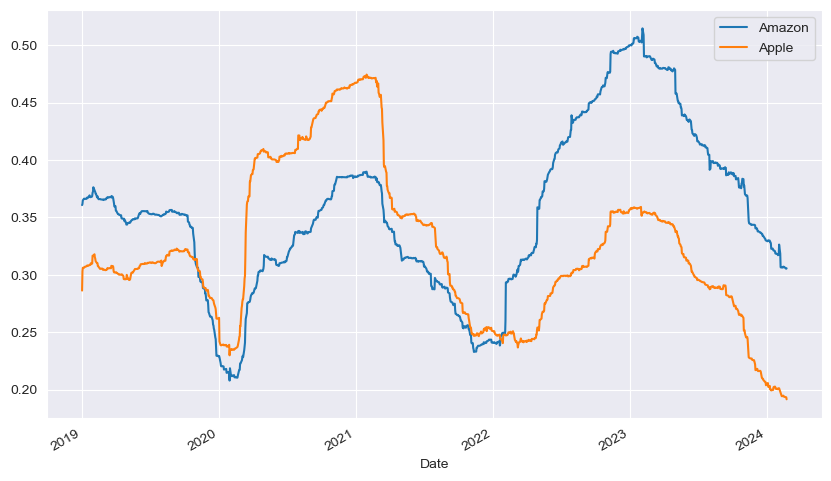

In [21]:
#200 päivän liukuva volatiliteetti
plt.figure(figsize = (10, 6))
(muutokset['Amazon%'].rolling(252).std() * (252**0.5)).plot(label='Amazon', legend=True)
(muutokset['Apple%'].rolling(252).std() * (252**0.5)).plot(label='Apple', legend=True)

Volatiliteetti ollut huomattavasti suurempaa kuin esim. harjoitusmateriaalin esimerkissä (Elisa ja Telia)

Text(0.5, 1.0, 'Amazonin ja Applen osakkeiden hinnan kehitys')

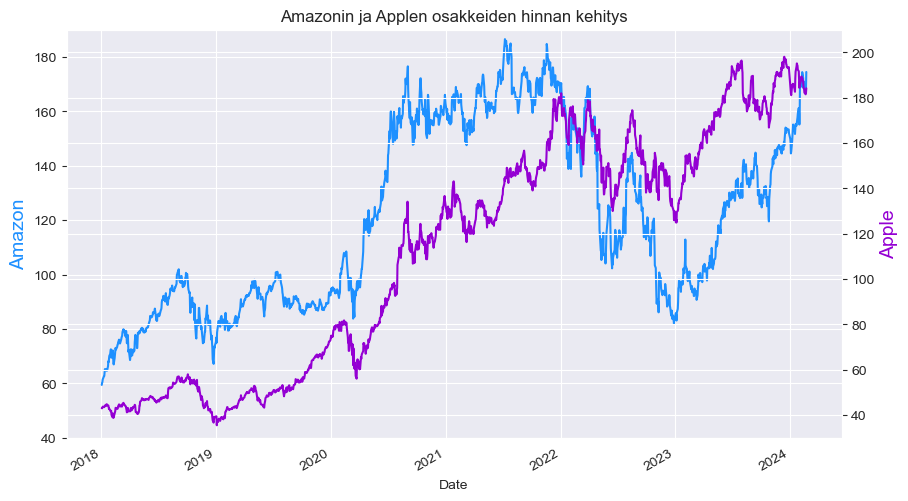

In [22]:
#Kahden arvoakselin viivakaavio: voidaan kuvata Apple ja Amazon samaan kaavioon vaikka päätöshinnat ovat eri suuruusluokkaa.

plt.figure(figsize=(10, 6))

# Viivakaavio Amazonin päätöshinnoista
amz = amazon['Close'].plot(color='dodgerblue')

#Sininen väri Amazonille
plt.ylabel('Amazon', color='dodgerblue', fontsize=14)

#Arvoakselin skaalaus
plt.ylim(40, 190)

#Applelle kaavio, jolla on yhteinen x-akseli Amazonin kaavion kanssa
apl = amz.twinx()

#Viivakaavio Applen päätöshinnoista
apple['Close'].plot(ax=apl, color='darkviolet')

#Violetti väri Applelle
plt.ylabel('Apple', color='darkviolet', fontsize=14)

#Applen arvoakselin skaalaus
plt.ylim(30, 210)

plt.title('Amazonin ja Applen osakkeiden hinnan kehitys')

In [23]:
#Viikonpäivien yhteys tuottoprosenttiin

viikonpaivat = ['ma', 'ti', 'ke', 'to', 'pe']

muutokset['Weekday'] = muutokset.index.weekday

df1 = (muutokset*100).groupby('Weekday')['Amazon%'].describe()
df1.index = viikonpaivat
df1

,count,mean,std,min,25%,50%,75%,max
ma,286.0,0.108639,2.154411,-6.326358,-1.025192,0.186357,1.327962,7.929520
ti,318.0,0.190282,1.960614,-7.057528,-0.885538,0.209129,1.350703,7.026613
ke,317.0,0.171594,2.112098,-7.156197,-0.973782,0.171435,1.273202,9.445222
to,314.0,0.090747,2.215767,-7.922083,-1.015023,0.081516,1.113895,12.177848
pe,310.0,-0.092512,2.616145,-14.049438,-1.216408,-0.222936,0.908988,13.535902


Perjantait ovat jännittäviä

In [24]:
#Testataan torstain ja perjantain väliset erot

#Ryhmien muodostaminen
to = muutokset['Amazon%'][muutokset['Weekday']==3]
pe = muutokset['Amazon%'][muutokset['Weekday']==4]

#Kahden riippumattoman (ind) otoksen t-testi
from scipy.stats import ttest_ind
ttest_ind(to, pe, equal_var=False, nan_policy='omit')

TtestResult(statistic=0.9436617501049717, pvalue=0.34572042509965095, df=603.0521492322097)

In [25]:
#Sama Applelle

df2 = (muutokset*100).groupby('Weekday')['Apple%'].describe()
df2.index = viikonpaivat
df2

,count,mean,std,min,25%,50%,75%,max
ma,286.0,0.234669,2.158791,-12.864696,-0.842280,0.367760,1.413758,9.310072
ti,318.0,0.160390,1.806225,-6.729497,-0.837232,0.026462,1.175833,10.032540
ke,317.0,0.200539,1.818252,-5.641918,-0.652481,0.178568,1.035530,7.042155
to,314.0,0.000896,2.014944,-9.960737,-0.809953,0.113357,1.093327,8.897457
pe,310.0,-0.020146,2.102503,-6.633069,-1.022736,-0.099276,1.014739,11.980827


In [26]:
#Ryhmien muodostaminen
to = muutokset['Apple%'][muutokset['Weekday']==3]
pe = muutokset['Apple%'][muutokset['Weekday']==4]

#Kahden riippumattoman (ind) otoksen t-testi
from scipy.stats import ttest_ind
ttest_ind(to, pe, equal_var=False, nan_policy='omit')

TtestResult(statistic=0.12761605342547186, pvalue=0.8984941989068485, df=620.1008947389424)

Sekä Applen että Amazonin osalla positiivinen tilastollinen arvo osoittaa, että torstaisin nähdään yleensä positiivisempaa muutosta kuin perjantaisin. P-arvot ovat korkeita, mikä tosin viittaa siihen, että ei ole tilastollisesti merkitsevää eroa ryhmien keskiarvojen välillä.

-----------------------------------------------------------------
OSA 2: AIKASARJAENNUSTAMINEN

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.api import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing

sns.set_style('whitegrid')

In [28]:
#Ladataan data oluen tuotantomääristä

df3 = pd.read_csv(r"C:\Users\nikla\OneDrive\Työpöytä\Haaga-Helia\Data-analytiikka\Tehtävät\monthly-beer-production-in-austr.csv")
df3.index=pd.to_datetime(df3['Month'],format='%Y-%m')
df3=df3.drop('Month',axis=1)
df3

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9
...,...
1995-04-01,127.0
1995-05-01,151.0
1995-06-01,130.0


<Axes: xlabel='Month'>

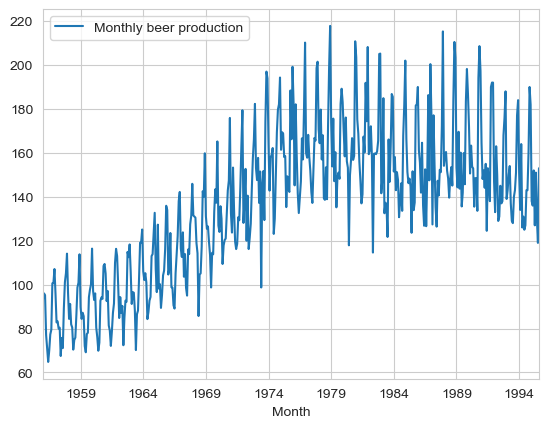

In [29]:
df3.plot()

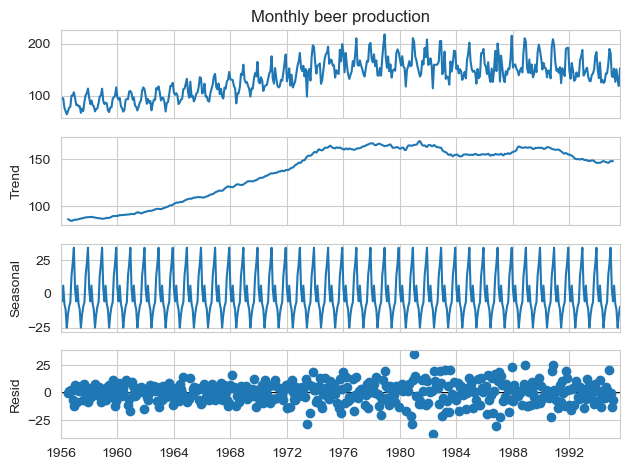

In [30]:
#Vaihtelua aiheuttavien komponenttien erottelu

decompose = seasonal_decompose(df3['Monthly beer production']).plot()

Selvä kausivaihtelu. Selvä nousutrendi noin datan puoliväliin asti, jonka jälkeen tasaantunut ja hieman laskeva.

In [31]:
#Ennustemalli sovitetaan dataan. Trendiin ja kausivaihteluun käytetään summamallia. Kausivaihtelu näyttää olevan suhteellisen vakio, johon ymmärtääkseni sopii hyvin summamalli. Kokeilin tulomallia, mutta mielestäni ennustevirheiden laajuus oli suurempi testatessa. 
#Data mitattu kuun alusta, joten käytetään freq: month start. Kausivaihtelu näyttää esiintyvän neljän vuosineljänneksen jaksoissa.

#Kokeilujen jälkeen päädyin käyttämään 12 season periodia; kvartaali tai puoli vuotta antoi epäuskottavia tuloksia

malli = ExponentialSmoothing(df3['Monthly beer production'], trend='add', seasonal='add',
                             seasonal_periods=12, freq='MS').fit()

In [32]:
df3['Forecast'] = malli.fittedvalues
df3

,Monthly beer production,Forecast
Month,,
1956-01-01,93.2,91.598222
1956-02-01,96.0,84.319475
1956-03-01,95.2,92.488077
1956-04-01,77.1,80.457405
1956-05-01,70.9,76.392300
...,...,...
1995-04-01,127.0,135.974409
1995-05-01,151.0,130.146318
1995-06-01,130.0,119.468970


<Axes: xlabel='Month'>

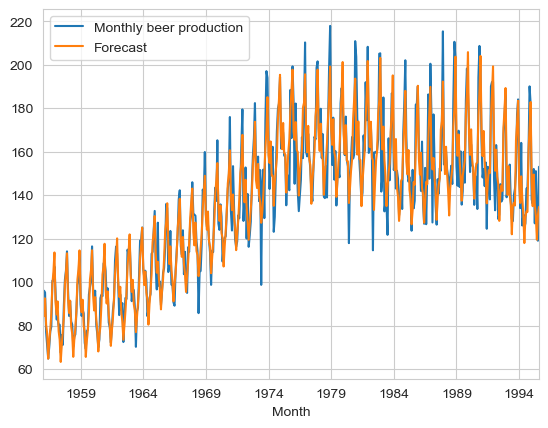

In [33]:
#Tuotanto ja mallin ennuste samassa kaaviossa

df3.plot()

In [34]:
#Ennustevirheet
df3['FC error'] = malli.resid
df3

,Monthly beer production,Forecast,FC error
Month,,,
1956-01-01,93.2,91.598222,1.601778
1956-02-01,96.0,84.319475,11.680525
1956-03-01,95.2,92.488077,2.711923
1956-04-01,77.1,80.457405,-3.357405
1956-05-01,70.9,76.392300,-5.492300
...,...,...,...
1995-04-01,127.0,135.974409,-8.974409
1995-05-01,151.0,130.146318,20.853682
1995-06-01,130.0,119.468970,10.531030


Text(0, 0.5, 'Forecast error')

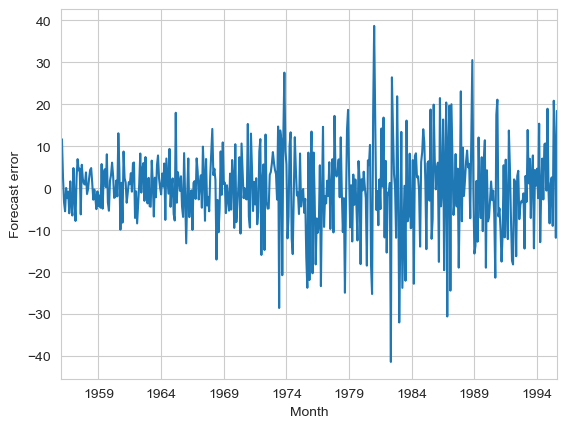

In [35]:
df3['FC error'].plot()
plt.ylabel('Forecast error')

Text(0, 0.5, 'Actual production')

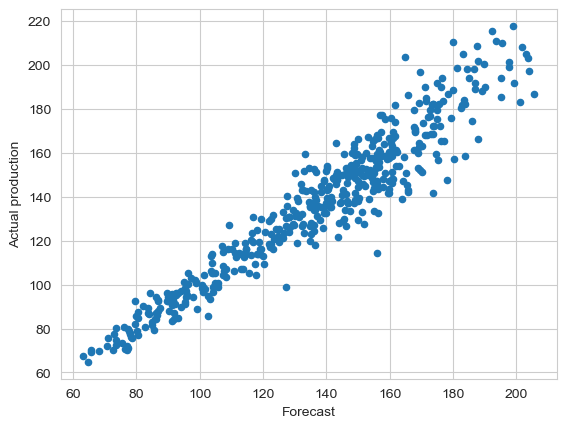

In [36]:
#Ennusteiden ja toteutuneiden kysyntöjen hajontakaavio

df3.plot(kind='scatter', x='Forecast', y='Monthly beer production')
plt.xlabel('Forecast')
plt.ylabel('Actual production')

Hajontakaavio näyttää amatöörin silmään melko hyvältä, havaittavissa vasemmasta alakulmasta oikeaan yläkulmaan liikkuva kuvio joka tarkoittaa että ennusteet ja toteutumat ovat lähellä toisiaan

In [37]:
malli.summary()

Dep. Variable:,Monthly beer production,No. Observations:,476
Model:,ExponentialSmoothing,SSE,46639.295
Optimized:,True,AIC,2214.356
Trend:,Additive,BIC,2281.002
Seasonal:,Additive,AICC,2215.852
Seasonal Periods:,12,Date:,"Thu, 22 Feb 2024"
Box-Cox:,False,Time:,22:52:18
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0773138,alpha,True
smoothing_trend,0.0773138,beta,True


In [38]:
df3.tail()

,Monthly beer production,Forecast,FC error
Month,,,
1995-04-01,127.0,135.974409,-8.974409
1995-05-01,151.0,130.146318,20.853682
1995-06-01,130.0,119.468970,10.531030
1995-07-01,119.0,130.811845,-11.811845
1995-08-01,153.0,134.558315,18.441685


In [39]:
#Ennustettavien ajankohtien aikaleimat (luodaan ennuste kuudelle vuodelle)
index = pd.date_range('1995-09-01', periods=60, freq='MS')

ennusteet = malli.forecast(60)

# Ennusteet dataframeen
df3_ennuste = pd.DataFrame(data=ennusteet, index=index, columns=['Forecast'])
df3_ennuste

,Forecast
1995-09-01,135.301013
1995-10-01,161.838066
1995-11-01,174.593413
1995-12-01,183.026127
1996-01-01,146.033655
1996-02-01,136.353012
1996-03-01,151.143600
1996-04-01,136.496603
1996-05-01,134.606524
1996-06-01,121.375402


<Axes: xlabel='Month'>

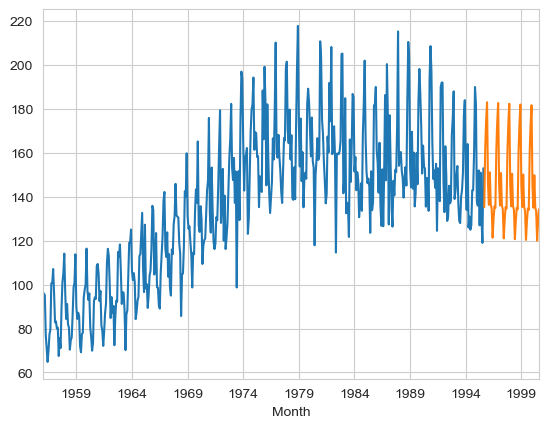

In [40]:
df3['Monthly beer production'].plot()

df3_ennuste['Forecast'].plot()

Kaavioon lisätty ennuste näyttää uskottavalta. Trendivaihtelu on linjassa, ja aiempina vuosina alkanut laskeva trendi jatkuu (joskin hieman tasoittuen)

In [42]:
df3 = pd.concat([df3, df3_ennuste])
df3

,Monthly beer production,Forecast,FC error
1956-01-01,93.2,91.598222,1.601778
1956-02-01,96.0,84.319475,11.680525
1956-03-01,95.2,92.488077,2.711923
1956-04-01,77.1,80.457405,-3.357405
1956-05-01,70.9,76.392300,-5.492300
...,...,...,...
2000-04-01,NaN,135.154084,NaN
2000-05-01,NaN,133.264006,NaN
2000-06-01,NaN,120.032883,NaN
2000-07-01,NaN,128.341341,NaN


<Axes: >

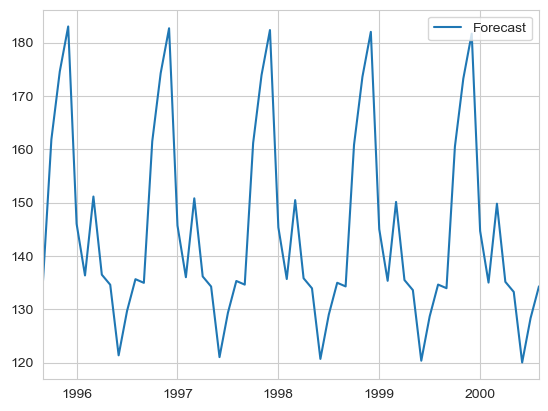

In [44]:
df3_ennuste.plot()

Ennusteen mukaan oluentuotanto pysyy melko tasaisena 2000-luvulle asti, joskin pienen pientä laskua havaittavissa.